# 《合成孔径雷达成像——算法与实现》中3.1.1 线性调频信号的时域表达

## 线性调频信号(LFM)

个人理解，所谓线性调频信号，就是频率随时间线性变化的信号，即f = K*t。

对应于时域，随着时间的推移，波形变化愈来愈快。

设中心频率为$f_0$, 则时域表达式为 $s(t)=rect(\frac{t}{T})e^{j(2\pi f_0 t+\pi K t^2)}$


## 线性调频脉冲的相位及频率

相位是2次函数  $\phi(t) = \pi K t^2$, 频率是线性函数 $f(t) = Kt$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [4]:
f0 = 0                   #中心频率
T = 1e-7;                #脉宽
B = 1e9;                 #带宽
K = B/T;                 #调频率
ratio = 5;               #过采样率
Fs = ratio*B;            #采样频率
Ts = 1/Fs;               #采样间隔
N = int(np.ceil(T/Ts));  #采样点数
sr = np.arange(0,N)
t = np.linspace(-T/2,T/2,N);     #时间轴

y = np.exp(1j*(2*np.pi*f0*t+np.pi*K*t**2));     #生成信号


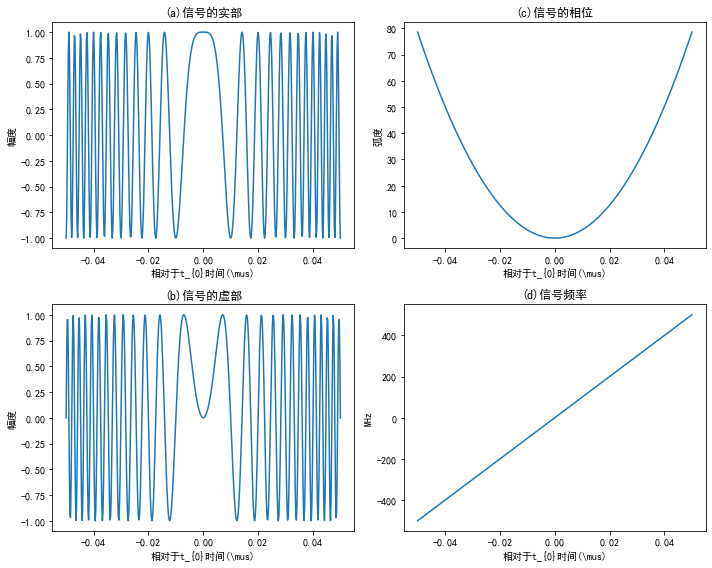

In [5]:
plt.figure(figsize=(10, 8))#,set(gcf,'Color','w');
plt.subplot(2,2,1)
plt.plot(t*1e6,np.real(y));
plt.title('(a)信号的实部');plt.xlabel('相对于t_{0}时间(\mus)');plt.ylabel('幅度');
plt.subplot(2,2,2)
plt.plot(t*1e6,2*np.pi*f0*t+np.pi*K*t**2);
plt.title('(c)信号的相位');plt.xlabel('相对于t_{0}时间(\mus)');plt.ylabel('弧度');
plt.subplot(2,2,3);
plt.plot(t*1e6,np.imag(y));
plt.title('(b)信号的虚部');plt.xlabel('相对于t_{0}时间(\mus)');plt.ylabel('幅度');
plt.subplot(2,2,4);
plt.plot(t*1e6,K*t*1e-6);
plt.title('(d)信号频率');plt.xlabel('相对于t_{0}时间(\mus)');plt.ylabel('MHz');
plt.tight_layout()